### ***Analyzing and Visualizing the Global Happiness Index with Python***

### **Task 1**- Load, pre-process the dataset and display a sample of the dataset using a table

In [3]:
#combine all csv files and load the dataset
import pandas as pd
import glob

# Step 1: Load all CSV files 
file_paths = glob.glob(r"C:\Users\aslia\OneDrive\Desktop\Final\WHR*.csv") 

dfs = []
for file in file_paths:
    df = pd.read_csv(file)
    dfs.append(df) 

# Step 2: Combine all datasets
combined_df = pd.concat(dfs, ignore_index=True)


In [4]:
#check if file paths include all csv files
print(file_paths)

['C:\\Users\\aslia\\OneDrive\\Desktop\\Final\\WHR20.csv', 'C:\\Users\\aslia\\OneDrive\\Desktop\\Final\\WHR21.csv', 'C:\\Users\\aslia\\OneDrive\\Desktop\\Final\\WHR22.csv', 'C:\\Users\\aslia\\OneDrive\\Desktop\\Final\\WHR23.csv', 'C:\\Users\\aslia\\OneDrive\\Desktop\\Final\\WHR24.csv']


In [5]:
#check if column names are consistent?

[df.columns.tolist() for df in dfs]

[['Country',
  'Year',
  'Explained by: GDP per capita',
  'Explained by: Social support',
  'Explained by: Healthy life expectancy',
  'Explained by: Freedom to make life choices',
  'Explained by: Generosity',
  'Explained by: Perceptions of corruption',
  'Dystopia + residual'],
 ['Country',
  'Year',
  'Explained by: GDP per capita',
  'Explained by: Social support',
  'Explained by: Healthy life expectancy',
  'Explained by: Freedom to make life choices',
  'Explained by: Generosity',
  'Explained by: Perceptions of corruption',
  'Dystopia + residual'],
 ['Country',
  'Year',
  'Explained by: GDP per capita',
  'Explained by: Social support',
  'Explained by: Healthy life expectancy',
  'Explained by: Freedom to make life choices',
  'Explained by: Generosity',
  'Explained by: Perceptions of corruption',
  'Dystopia + residual'],
 ['Country',
  'Year',
  'Explained by: GDP per capita',
  'Explained by: Social support',
  'Explained by: Healthy life expectancy',
  'Explained by: 

In [6]:
#check first 5 rows

combined_df.head()

,Country,Year,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,2020,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,2020,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,2020,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,2020,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,2020,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [7]:
# Clean column names: lowercase, replace spaces with underscores, remove colons

combined_df.columns = (
    combined_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ","_")
    .str.replace(":","")
    .str.replace("+","")

)

In [8]:
#check first 5 rows

combined_df.head()

,country,year,explained_by_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual
0,Finland,2020,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,2020,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,2020,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,2020,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,2020,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [9]:
#check missing values
combined_df.isnull().sum()

country                                      0
year                                         0
explained_by_gdp_per_capita                  3
explained_by_social_support                  3
explained_by_healthy_life_expectancy         4
explained_by_freedom_to_make_life_choices    3
explained_by_generosity                      3
explained_by_perceptions_of_corruption       3
dystopia__residual                           4
dtype: int64

In [10]:
#check data types
combined_df.dtypes

country                                       object
year                                           int64
explained_by_gdp_per_capita                  float64
explained_by_social_support                  float64
explained_by_healthy_life_expectancy         float64
explained_by_freedom_to_make_life_choices    float64
explained_by_generosity                      float64
explained_by_perceptions_of_corruption       float64
dystopia__residual                           float64
dtype: object

In [16]:
# fill the missing values
num_cols = combined_df.drop("country", axis=1)
num_cols

combined_df[num_cols.columns] = combined_df[num_cols.columns].fillna(num_cols.mean())

In [19]:
#check missing values again
combined_df.isnull().sum()

country                                      0
year                                         0
explained_by_gdp_per_capita                  0
explained_by_social_support                  0
explained_by_healthy_life_expectancy         0
explained_by_freedom_to_make_life_choices    0
explained_by_generosity                      0
explained_by_perceptions_of_corruption       0
dystopia__residual                           0
dtype: int64

### **Task 1b** - Display a Sample Table

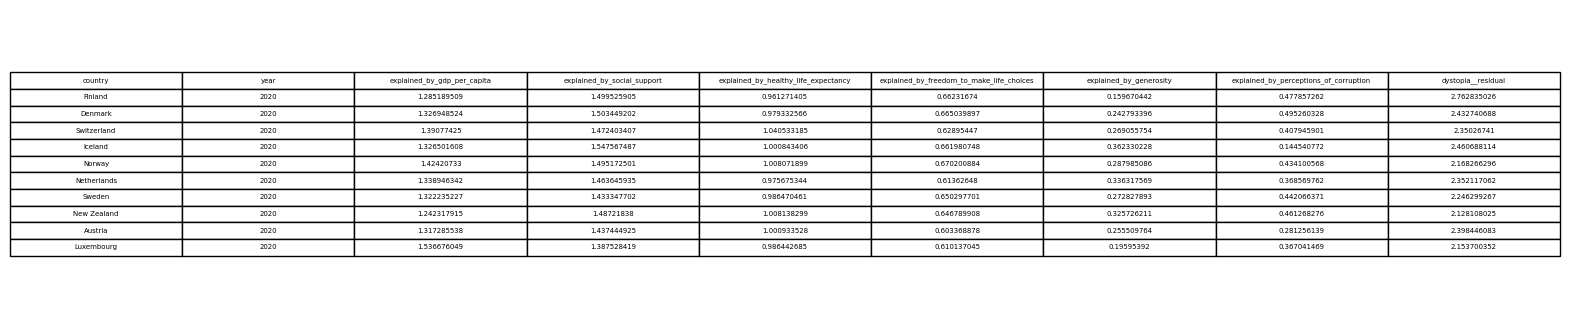

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Display first 10 rows as table

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis("off")
table = ax.table(
    cellText=combined_df.head(10).values,
    colLabels=combined_df.columns,
    cellLoc="center",
    loc="center")
table.auto_set_font_size(False)
table.set_fontsize(5)
plt.show()

### **Task 2** - Analyze the distribution of the happiness score across countries using histogram

In [ ]:
# First Create the Happiness Score Column

components = [
    "explained_by_gdp_per_capita",
    "explained_by_social_support",
    "explained_by_healthy_life_expectancy",
    "explained_by_freedom_to_make_life_choices",
    "explained_by_generosity",
    "explained_by_perceptions_of_corruption",
    "dystopia__residual"
]

combined_df["happiness_score"] = combined_df[components].sum(axis=1)


In [46]:
#check if changes applied

combined_df.head()

,country,year,explained_by_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual,happiness_score
0,Finland,2020,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,7.808666
1,Denmark,2020,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,7.645565
2,Switzerland,2020,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,7.559934
3,Iceland,2020,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,7.504452
4,Norway,2020,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,7.488005


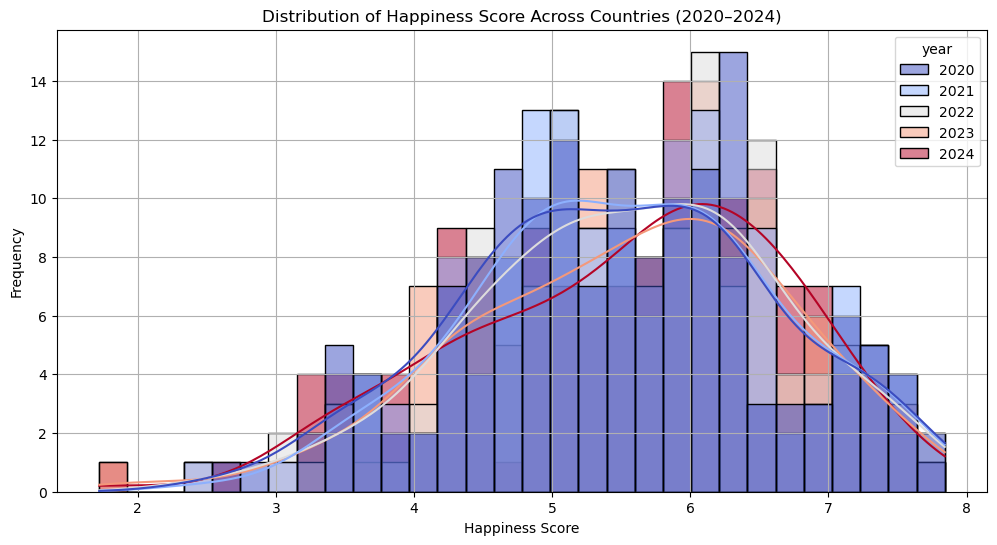

In [53]:
# Plot the Distribution

import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(data=combined_df, x="happiness_score", bins=30, hue="year", kde=True, palette="coolwarm")
plt.title("Distribution of Happiness Score Across Countries (2020–2024)")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### **Task 3** - Identify the top and bottom 10 countries by happiness score using horizontal bar chart

In [ ]:
# I decided to use most recent year 2024

latest_year = combined_df["year"].max()
df_2024 = combined_df[combined_df["year"] == latest_year]


# Identifying Top & Bottom 10

top10= df_2024.nlargest(10, "happiness_score")
bottom10 = df_2024.nsmallest(10, "happiness_score")


In [64]:
# Combine and Mark Groups

top10["group"] = "Top 10"
bottom10["group"] = "Bottom 10"

combined = pd.concat([top10, bottom10])

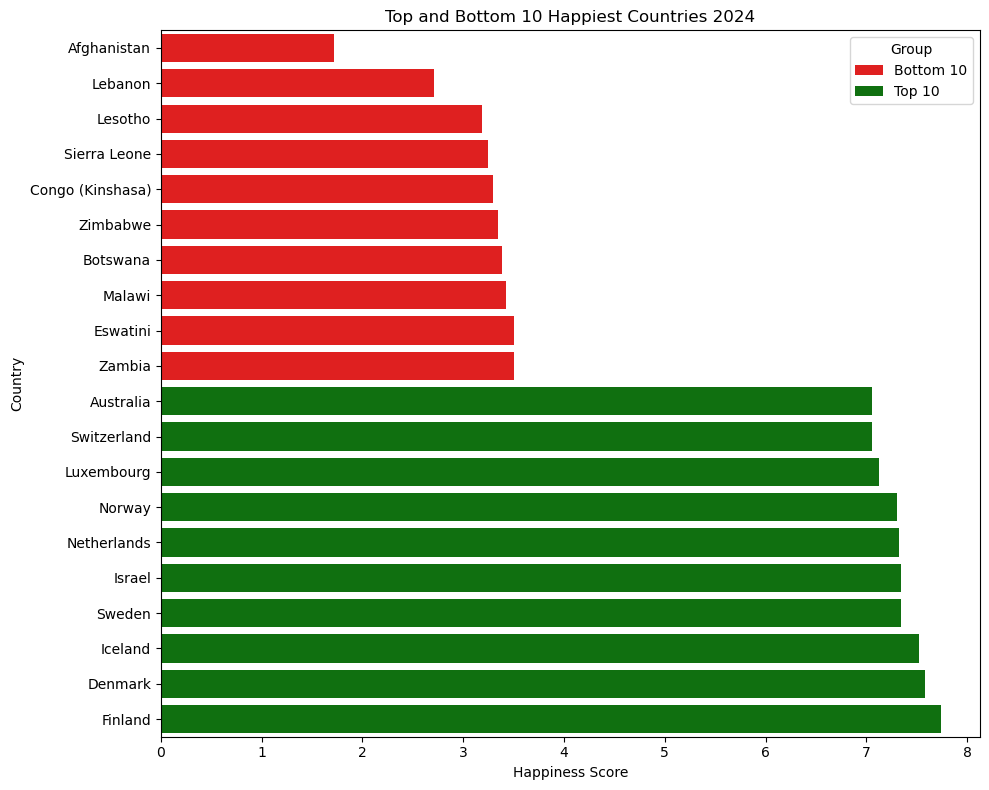

In [65]:
# Horizontal Bar Chart with Color Encoding

plt.figure(figsize=(10,8))
sns.barplot(data=combined.sort_values("happiness_score"), x="happiness_score", y="country", hue="group", palette={"Top 10": "green", "Bottom 10": "red"})

plt.title("Top and Bottom 10 Happiest Countries 2024")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend(title="Group")
plt.tight_layout()
plt.show()

### **Task 4**- Find correlations between happiness and other indicators using scatter plot 

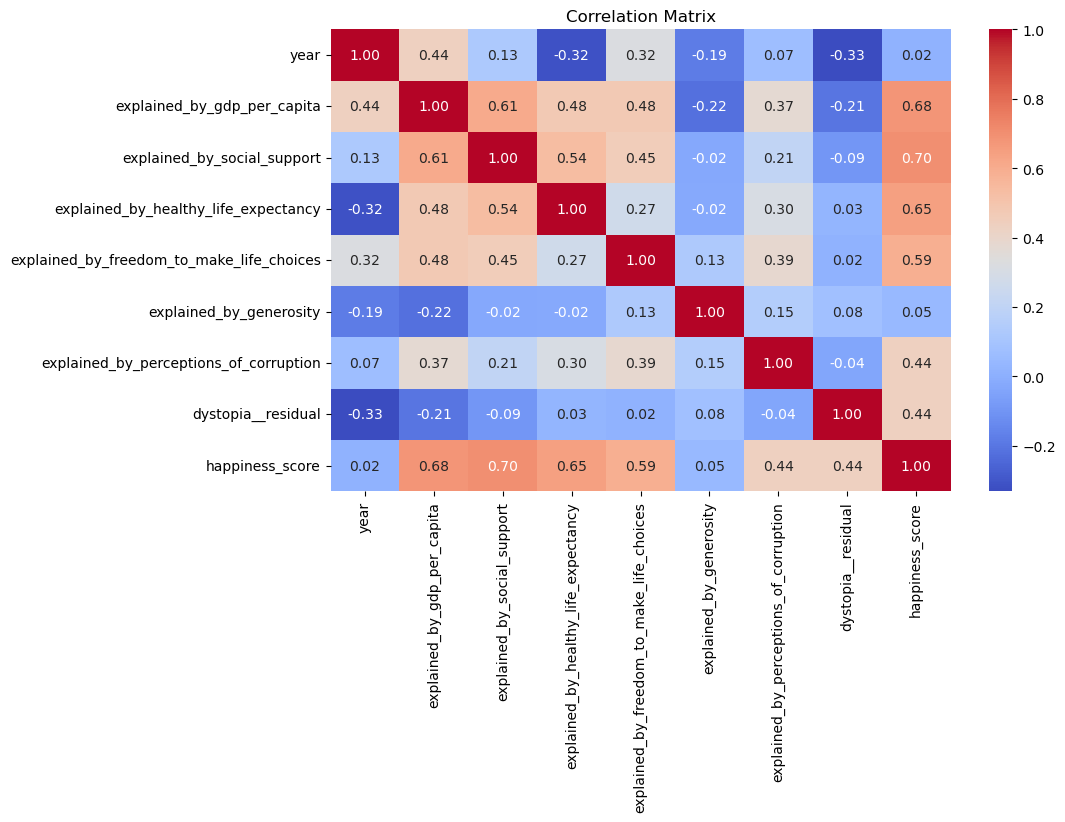

In [ ]:
# Keep only numerical columns
corr_matrix = combined_df.select_dtypes(include="number").corr()

# Plot a Heatmap of Correlation

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### From the correlation matrix we are able to see the most correlated features are: social support, gdp per capita and healty life expectancy.

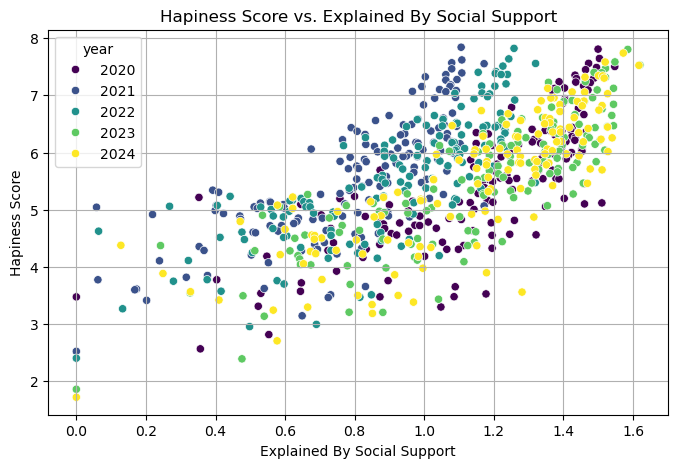

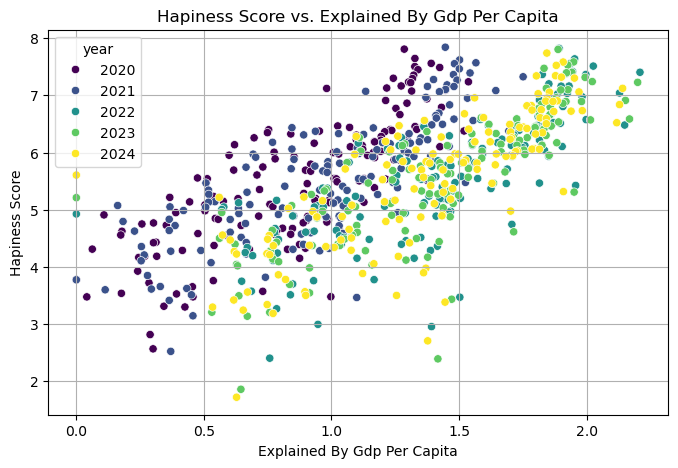

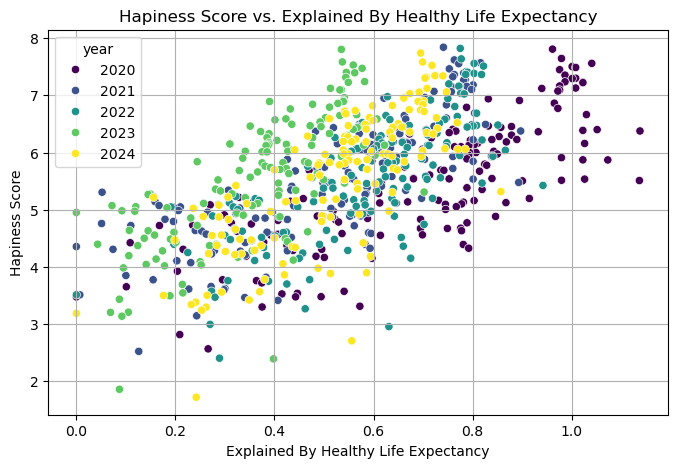

In [ ]:
# Scatter Plots Between Happiness and Social Support

top_features = happiness_corr.index[:3] # Take top 3 strongest correlations

for feature in top_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=combined_df, x=feature, y="happiness_score", hue="year",  palette="viridis")
    plt.title(f"Hapiness Score vs. {feature.replace("_", " ").title()}")
    
    plt.xlabel(feature.replace("_"," ").title())
    plt.ylabel("Hapiness Score")
    plt.grid(True)
    plt.show()

### **Task 5**-  Analyze how the rankings of top countries changed over the last five years using Line plot


In [ ]:
# Identify Top 5 Countries in 2024

latest_year = combined_df["year"].max()
top5_countries = (
    combined_df[combined_df["year"] == latest_year]
    .nlargest(5, "happiness_score")["country"]
    .tolist()
)

top5_countries


['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel']

In [90]:
# Filter Data for These Countries Across Years

top5_df = combined_df[combined_df["country"].isin(top5_countries)]


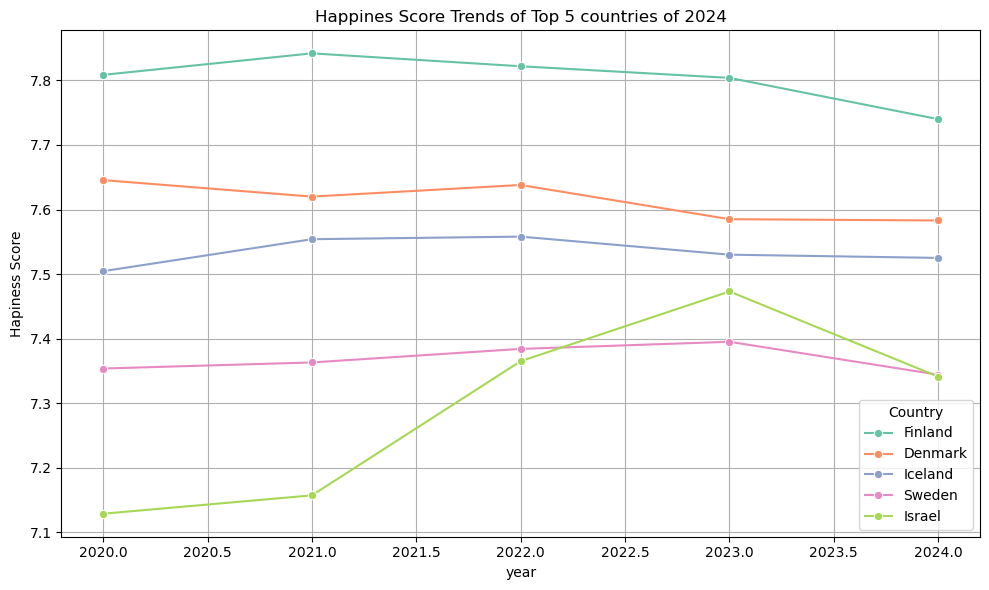

In [91]:
# Line Plot of Their Happiness Trends

plt.figure(figsize=(10,6))
sns.lineplot(data=top5_df, x="year", y="happiness_score", hue="country", marker="o", palette="Set2")
plt.title("Happines Score Trends of Top 5 countries of 2024")
plt.xlabel("year")
plt.ylabel("Hapiness Score")
plt.grid(True)

plt.legend(title="Country")
plt.tight_layout()
plt.show()

### **Task 6**- Plot happiness scores on a world map using Choropleth map 

In [93]:
# Install & Import Plotly

!pip install plotly
import plotly.express as px


In [126]:
#First I want to make sure if country names are correct 

combined_df["country"].unique().tolist()

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Norway',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Austria',
 'Luxembourg',
 'Canada',
 'Australia',
 'United Kingdom',
 'Israel',
 'Costa Rica',
 'Ireland',
 'Germany',
 'United States',
 'Czech Republic',
 'Belgium',
 'United Arab Emirates',
 'Malta',
 'France',
 'Mexico',
 'Taiwan Province of China',
 'Uruguay',
 'Saudi Arabia',
 'Spain',
 'Guatemala',
 'Italy',
 'Singapore',
 'Brazil',
 'Slovenia',
 'El Salvador',
 'Kosovo',
 'Panama',
 'Slovakia',
 'Uzbekistan',
 'Chile',
 'Bahrain',
 'Lithuania',
 'Trinidad and Tobago',
 'Poland',
 'Colombia',
 'Cyprus',
 'Nicaragua',
 'Romania',
 'Kuwait',
 'Mauritius',
 'Kazakhstan',
 'Estonia',
 'Philippines',
 'Hungary',
 'Thailand',
 'Argentina',
 'Honduras',
 'Latvia',
 'Ecuador',
 'Portugal',
 'Jamaica',
 'South Korea',
 'Japan',
 'Peru',
 'Serbia',
 'Bolivia',
 'Pakistan',
 'Paraguay',
 'Dominican Republic',
 'Bosnia and Herzegovina',
 'Moldova',
 'Tajikistan',
 'Montenegro',
 'Russ

In [145]:
# Remove asterisks from country names

combined_df["country"] =combined_df["country"].str.replace(r"\*", "", regex=True).str.strip()

In [ ]:
# Manual corrections of mismatched names

name_corrections = {
    "Czech Republic": "Czechia",
    "Ivory Coast": "Côte d"Ivoire",
    "Swaziland": "Eswatini",
    "State of Palestine": "Palestine",
    "Palestinian Territories": "Palestine",
    "North Macedonia": "Macedonia",
    "Turkiye": "Turkey",
    "Russia": "Russian Federation",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People"s Republic of",
    "Vietnam": "Viet Nam",
    "Iran": "Iran, Islamic Republic of",
    "Syria": "Syrian Arab Republic",  
    "Hong Kong S.A.R. of China": "Hong Kong",
    "Taiwan Province of China": "Taiwan",
    "Kosovo": "Serbia", 
    "Moldova": "Moldova, Republic of",
    "Tanzania": "Tanzania, United Republic of",
    "Myanmar": "Myanmar (Burma)",
    "Congo (Brazzaville)": "Republic of the Congo",
    "Congo (Kinshasa)": "Republic of the Congo",
    "Democratic Republic of the Congo": "Congo, The Democratic Republic of the",
    "United States of America": "United States",
    "Slovak Republic": "Slovakia",
    "Brunei": "Brunei Darussalam",
    "Cape Verde": "Cabo Verde",
    "Micronesia": "Micronesia, Federated States of",
    "Saint Kitts and Nevis": "St. Kitts and Nevis",
    "Saint Lucia": "St. Lucia",
    "Saint Vincent and the Grenadines": "St. Vincent and the Grenadines",
    "Bahamas, The": "Bahamas",
    "North Cyprus": "Cyprus",  # Fallback, not officially recognized
}

# Apply corrections
combined_df["country"] = combined_df["country"].replace(name_corrections)

In [148]:
#just checking

combined_df["country"].nunique()

152

In [149]:
# I will plot for one year only for recent year 2024

# Preparing the Data and copying

latest_year = combined_df["year"].max()

df_map = combined_df[combined_df["year"] == latest_year].copy()

In [150]:
# Make sure the column names are clean and country unique values

df_map.columns = df_map.columns.str.replace("+", "").str.replace("__","_")
df_map

df_map["country"].nunique()

142

In [151]:
# Generate the Choropleth Map

fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="happiness_score",
    hover_name="country",
    color_continuous_scale="Viridis",
    title=f"Global Happiness Score ({latest_year})")

fig.update_geos(showcoastlines=True, projection_type="natural earth")
fig.update_layout(margin={"r":0, "t":50, "l": 0, "b":0})
fig.show()

### **Task 7**- Analyze the relationship between GDP per capita and happiness score using Scatter Plot

In [ ]:
# Does more money really buy happiness?

# "Explained by: GDP per capita" — this isn’t raw GDP, it’s contribution of GDP to happiness.
# Filter for Most Recent Year
latest_year = combined_df["year"].max()
df_gdp = combined_df[combined_df["year"] == latest_year].copy()


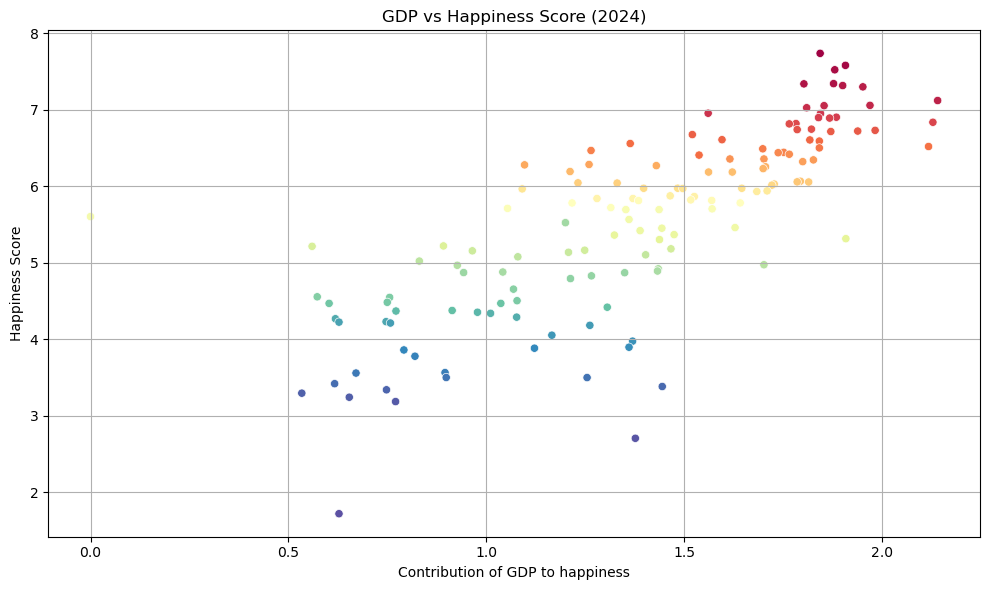

In [163]:
# Plot GDP vs. Happiness

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_gdp, y="happiness_score", x="explained_by_gdp_per_capita", hue="country", palette="Spectral", legend=False)

plt.title("GDP vs Happiness Score (2024)")
plt.xlabel("Contribution of GDP to happiness")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


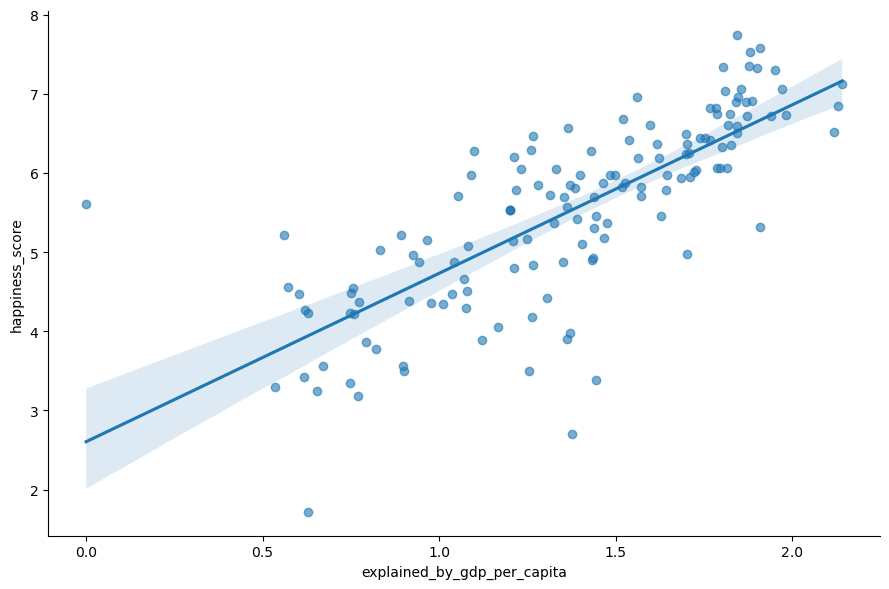

In [164]:
# In order to see regression line

sns.lmplot(
    data=df_gdp,
    x="explained_by_gdp_per_capita",
    y="happiness_score",
    height=6,
    aspect=1.5,
    scatter_kws={"alpha":0.6}
)

### **Task 8**- Group countries by continent and compute average happiness using box plots

In [ ]:
# Add Continent Information
!pip install pycountry_convert

import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"

combined_df["continent"] = combined_df["country"].apply(country_to_continent)

In [168]:
# check the continent column

combined_df.head()

,country,year,explained_by_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption,dystopia__residual,happiness_score,continent
0,Finland,2020,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,7.808666,Europe
1,Denmark,2020,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,7.645565,Europe
2,Switzerland,2020,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,7.559934,Europe
3,Iceland,2020,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,7.504452,Europe
4,Norway,2020,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,7.488005,Europe


In [ ]:
#Filter for Recent Year
latest_year = combined_df["year"].max()
df_continent = combined_df[combined_df["year"] == latest_year].copy()

C:\Users\aslia\AppData\Local\Temp\ipykernel_17916\330556733.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




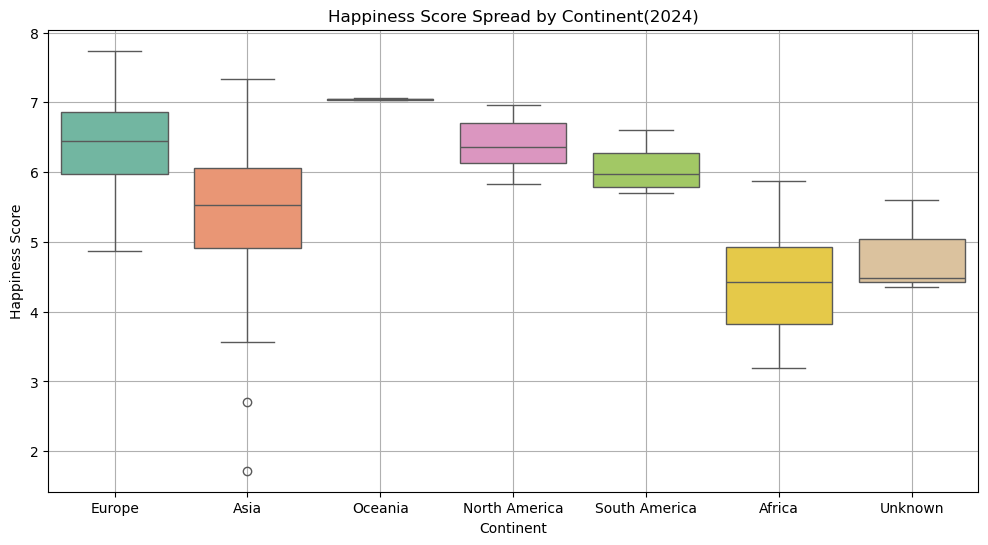

In [ ]:
# Create Box Plot

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_continent, x="continent", y="happiness_score", palette="Set2")

plt.title(f"Happiness Score Spread by Continent({latest_year})")
plt.xlabel("Continent")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()


### **Task 9**- Perform linear regression or feature importance to understand which factors most affect happiness. 

In [ ]:

# Select only numeric "explained by" columns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define feature columns and target
features = [
    "explained_by_gdp_per_capita",
    "explained_by_social_support",
    "explained_by_healthy_life_expectancy",
    "explained_by_freedom_to_make_life_choices",
    "explained_by_generosity",
    "explained_by_perceptions_of_corruption",
]

X = combined_df[features]
y = combined_df["happiness_score"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [ ]:
# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

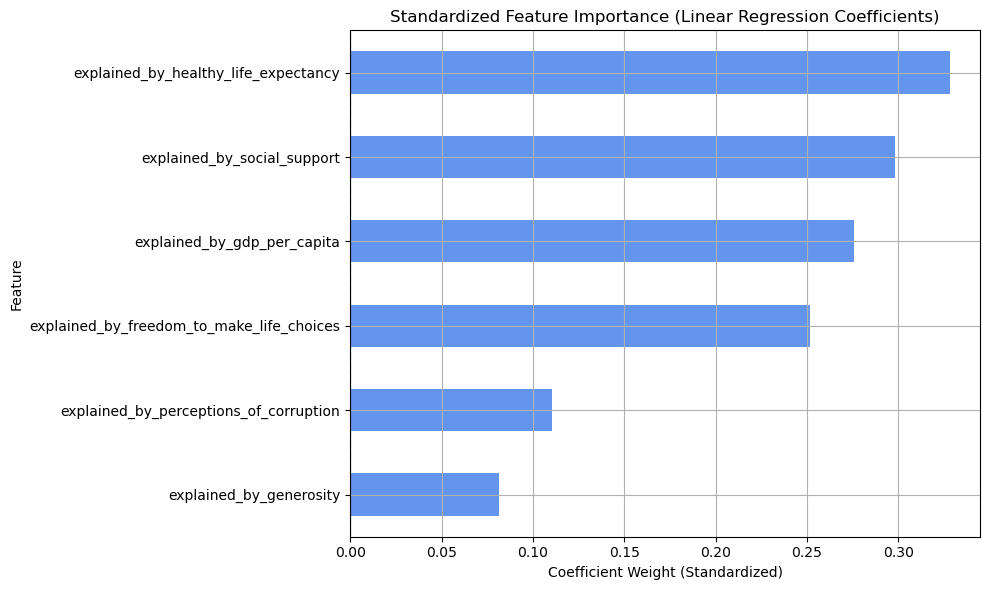

In [ ]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a Series for coefficients with feature names
coefficients = pd.Series(model.coef_, index=features)

# Plot sorted horizontal bar chart

plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind="barh", color="cornflowerblue")

plt.title("Standardized Feature Importance (Linear Regression Coefficients)")

plt.xlabel("Coefficient Weight (Standardized)")
plt.ylabel("Feature")
plt.axvline(0, color="black", linestyle="--")
plt.grid(True)
plt.tight_layout()
plt.show()


### **Task 10**- Combine multiple visualizations in an interactive dashboard

### Interactive Dashboard with Plotly
**Dashboard Features**

Dropdown to select year

Choropleth of happiness scores

In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Dropdown
year_dropdown = widgets.Dropdown(
    options=sorted(combined_df["year"].unique()),
    value=combined_df["year"].max(),
    description="Select Year:",
    style={"description_width": "initial"}
)

# Function to draw the map
def plot_choropleth(year):
    df_year = combined_df[combined_df["year"] == year]
    fig = px.choropleth(
        df_year,
        locations="country",
        locationmode="country names",
        color="happiness_score",
        hover_name="country",
        title=f"Happiness Score by Country - {year}",
        color_continuous_scale="Viridis"
    )
    fig.update_layout(margin={"r":0, "t":50, "l": 0, "b":0})
    fig.show()

# Connect dropdown to function
widgets.interact(plot_choropleth, year=year_dropdown)


interactive(children=(Dropdown(description='Select Year:', index=4, options=(2020, 2021, 2022, 2023, 2024), st…

<function __main__.plot_choropleth(year)>

### **Task 11**- Examine how perception of corruption correlates with happiness

In [250]:
import plotly.express as px

# Scatter Plot with Regression Line

def plot_corruption_vs_happiness(year):
    df_year = combined_df[combined_df["year"] == year]
    
    fig = px.scatter(
        df_year,
        x="explained_by_perceptions_of_corruption",
        y="happiness_score",
        hover_name="country",
        title="Perception of Corruption vs. Happiness Score (2024)",
        labels= {"explained_by_perceptions_of_corruption": "Trust in Government / Institutions",
            "happiness_score": "Happiness Score"},
        trendline="ols",#this addes regressionlime
        opacity=0.7
    )
    fig.update_layout(template="plotly_white")
    fig.show()
    
    # Interact with year
    
widgets.interact(plot_corruption_vs_happiness, year=year_dropdown)

interactive(children=(Dropdown(description='Select Year:', index=3, options=(2020, 2021, 2022, 2023, 2024), st…

<function __main__.plot_corruption_vs_happiness(year)>

### **Task 12**- Apply clustering algorithms like K-Means to group countries based on indicators such as GDP, social support, and health and use scatter plot using plotly

In [218]:
# Prepare Data for Clustering

from sklearn.preprocessing import StandardScaler

features = [
    "explained_by_gdp_per_capita",
    "explained_by_social_support",
    "explained_by_healthy_life_expectancy",
    "explained_by_freedom_to_make_life_choices",
    "explained_by_generosity",
    "explained_by_perceptions_of_corruption",
] #Only numeric features 

# Filter latest year for snapshot
latest_year = combined_df["year"].max()
df_cluster = combined_df[combined_df["year"] == latest_year].dropna(subset=features)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])


In [ ]:
# Apply K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add to DataFrame
df_cluster["cluster"] = clusters


c:\Users\aslia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [281]:
# 2D Cluster Plot with Plotly

import plotly.express as px

fig = px.scatter(
    df_cluster,
    x="explained_by_gdp_per_capita",
    y="explained_by_social_support",
    color="cluster",
    hover_name="country",
    title=f"Happiness Factor Clusters ({latest_year})",
    color_discrete_sequence=["blue","red","green","yellow"]
)
df_cluster["cluster"] = df_cluster["cluster"].astype(int)  # to get only 5 cluster not float likje 2.5

df_cluster["cluster"] = pd.Categorical(df_cluster["cluster"], categories=[0,1,2,3], ordered=True)

fig.update_layout(
    xaxis_title="GDP per Capita",
    yaxis_title="Social Support",
    template="plotly_white"
)
fig.show()

### **Task 13**-Create an animation showing how global happiness has changed over the last five years

In [230]:
fig = px.choropleth(
    combined_df,
    locations= "country",
    locationmode="country names",
    color="happiness_score",
    hover_name="country",
    hover_data=["explained_by_gdp_per_capita", "explained_by_social_support"],
    animation_frame="year",
    color_continuous_scale="Turbo",
    range_color=(combined_df["happiness_score"].min(), combined_df["happiness_score"].max()),
    title="Global Happiness Score Over Time (2020–2024)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    template="plotly_white",
    margin={"r":0,"t":40,"l":0,"b":0}
)



### **Task 14**-Explore the relationship between the freedom to make life choices and happiness score using Bubble chart 

In [284]:
# Since my dataset doesn’t has population or gdp_total, I will use "explained_by_gdp_per_capita" for bubble size and for "continent" for color


# Filter to latest year
latest_year = combined_df["year"].max()
df_2024 = combined_df[combined_df["year"] == latest_year]

# Drop rows with any missing values in required columns

df_bubble = df_2024.dropna(subset=[
    "explained_by_freedom_to_make_life_choices",
    "happiness_score",
    "explained_by_gdp_per_capita",
    "continent"
])

# plot 
fig = px.scatter(
    df_bubble,
    x="explained_by_freedom_to_make_life_choices",
    y="happiness_score",
    size="explained_by_gdp_per_capita", 
    color="continent",  
    hover_name="country",
    size_max=60,
    title="Bubble Chart: Happiness vs. Freedom to Make Life Choices (2024)"
)

fig.update_layout(template="plotly_white")
fig.show()


### **Task 15**- Create an interactive selector that lets users choose a country and view its happiness profile with combined multiple charts


Full Country Profile Dashboard

1-Line chart: Happiness score trend over time

2-Radar chart: Profile of key happiness factors (2024)

3-Bar chart: Exact values of those factors

In [ ]:
#All-in-One Dashboard

import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define key indicator columns

indicators = [
    "explained_by_gdp_per_capita",
    "explained_by_social_support",
    "explained_by_healthy_life_expectancy",
    "explained_by_freedom_to_make_life_choices",
    "explained_by_generosity",
    "explained_by_perceptions_of_corruption"
]

# Clean dşsplat names

indicator_labels = [i.replace("explained_by_","").replace("_", "").title() for i in indicators]

#dropdown for country selection

country_dropdown = widgets.Dropdown(
    options= sorted(combined_df["country"].unique()),
    value="Finland",
    description = "Select country",
    layout= widgets.Layout(),
    style={"description_width": "initial"}
)

def country_dashboard(country):
    clear_output(wait=True)
    display(country_dropdown)

    df_country = combined_df[combined_df["country"] == country].sort_values("year")
    latest = df_country.iloc[-1]

    ### 1. Line Chart: Happiness Over Time
    fig1 = px.line(
        df_country,
        x="year",
        y="happiness_score",
        markers=True,
        title=f"{country} - Happiness Score Over Time"
    )
    fig1.update_layout(template="plotly_white")

    ### 2. Radar Chart: Indicator Profile
    fig2 = go.Figure()
    fig2.add_trace(go.Scatterpolar(
        r=[latest[ind] for ind in indicators],
        theta=indicator_labels,
        fill='toself',
        name=country
    ))
    fig2.update_layout(
        polar=dict(radialaxis=dict(visible=True)),
        showlegend=False,
        title=f"{country} - Happiness Factors Radar ({int(latest['year'])})"
    )

    ### 3. Bar Chart: Factor Values
    fig3 = px.bar(
        x=[latest[ind] for ind in indicators],
        y=indicator_labels,
        orientation='h',
        labels={"x": "Score", "y": "Factor"},
        title=f"{country} - Happiness Factor Scores ({int(latest['year'])})"
    )
    fig3.update_layout(template="plotly_white")

    ### Display all three charts ###
    fig1.show()
    fig2.show()
    fig3.show()

# Connect dropdown to dashboard function
country_dropdown.observe(lambda change: country_dashboard(change['new']), names='value')
display(country_dropdown)

# Show initial dashboard
country_dashboard(country_dropdown.value)




Dropdown(description='Select country', index=33, options=('Afghanistan', 'Albania', 'Algeria', 'Argentina', 'A…